In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(10513, 2)

In [3]:
df.head()

,Time,domain
0,2021-02-10 09:40:56,www.facebook.com
1,2021-02-10 09:30:01,invest.ameritrade.com
2,2021-02-09 23:33:46,stackoverflow.com
3,2021-02-09 23:33:45,www.google.com
4,2021-02-09 23:12:28,hangouts.google.com


In [4]:
df.tail()

,Time,domain
10508,1600-12-31 19:00:00,stackblitz.com
10509,1600-12-31 19:00:00,docs.google.com
10510,1600-12-31 19:00:00,sites.google.com
10511,1600-12-31 19:00:00,onema.io
10512,1600-12-31 19:00:00,towardsdatascience.com


In [5]:
df.dtypes

Time      object
domain    object
dtype: object

In [6]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

22

In [7]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [8]:
df['Time'] = pd.to_datetime(df['Time'])

In [9]:
df['domain'].value_counts()[:50]

www.facebook.com                             1328
www.google.com                               1225
photos.google.com                            1010
www.airbnb.com                                609
mail.google.com                               535
www.amazon.com                                449
www.youtube.com                               414
github.com                                    342
www.netflix.com                               305
www.imdb.com                                  230
invest.ameritrade.com                         197
www.udemy.com                                 113
research.ameritrade.com                       112
www.disneyplus.com                            110
www.reserveamerica.com                         99
stackoverflow.com                              92
www.milliyet.com.tr                            89
secure.bankofamerica.com                       89
www.zillow.com                                 84
www.linkedin.com                               83


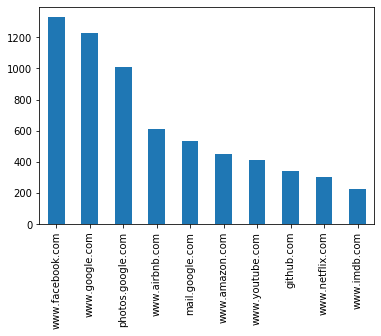

In [10]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [11]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0      672
1      181
2      164
3       21
4      114
5       17
6       47
7       43
8       37
9      147
10     295
11     231
12      81
13     232
14     362
15      93
16     160
17     521
18     736
19    1298
20    1198
21    1173
22    1581
23    1087
Name: domain, dtype: int64

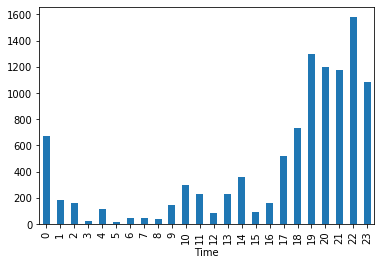

In [12]:
hourly_counts.plot.bar()

In [13]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-02-10 09:40:56,www.facebook.com,Wednesday,2
1,2021-02-10 09:30:01,invest.ameritrade.com,Wednesday,2
2,2021-02-09 23:33:46,stackoverflow.com,Tuesday,1
3,2021-02-09 23:33:45,www.google.com,Tuesday,1
4,2021-02-09 23:12:28,hangouts.google.com,Tuesday,1


In [14]:
df['Day'].value_counts()

Wednesday    2158
Thursday     1813
Sunday       1792
Saturday     1631
Monday       1225
Tuesday      1012
Friday        860
Name: Day, dtype: int64

In [15]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    1225
1    1012
2    2158
3    1813
4     860
5    1631
6    1792
Name: DayIndex, dtype: int64

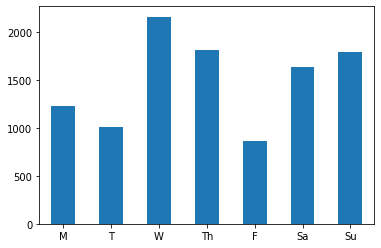

In [16]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [17]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-02-10 09:40:56,www.facebook.com,Wednesday,2,False
1,2021-02-10 09:30:01,invest.ameritrade.com,Wednesday,2,False
2,2021-02-09 23:33:46,stackoverflow.com,Tuesday,1,False
3,2021-02-09 23:33:45,www.google.com,Tuesday,1,False
4,2021-02-09 23:12:28,hangouts.google.com,Tuesday,1,False


In [18]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [19]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
53,2021-02-07 21:07:32,www.youtube.com,Sunday,6,True
54,2021-02-07 21:05:44,www.udemy.com,Sunday,6,True
55,2021-02-07 21:04:01,mail.google.com,Sunday,6,True
56,2021-02-07 21:03:28,mail.google.com,Sunday,6,True
57,2021-02-07 21:03:23,mail.google.com,Sunday,6,True


In [20]:
weekday['domain'].value_counts()[:5]

photos.google.com    813
www.facebook.com     790
www.google.com       772
www.airbnb.com       458
www.amazon.com       364
Name: domain, dtype: int64

In [21]:
weekend['domain'].value_counts()[:5]

www.facebook.com     538
www.google.com       453
photos.google.com    197
mail.google.com      183
www.airbnb.com       151
Name: domain, dtype: int64

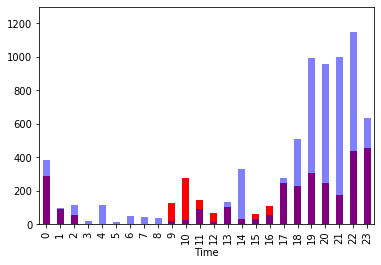

In [22]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 1300])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)


In [23]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

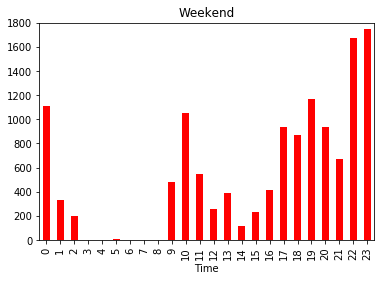

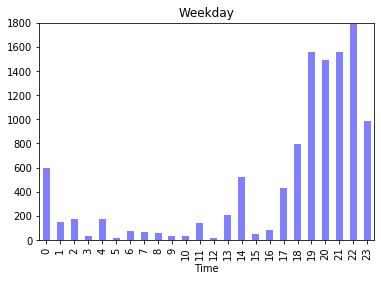

In [24]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [25]:
df['domain'].value_counts()[:50]

www.facebook.com                             1328
www.google.com                               1225
photos.google.com                            1010
www.airbnb.com                                609
mail.google.com                               535
www.amazon.com                                449
www.youtube.com                               414
github.com                                    342
www.netflix.com                               305
www.imdb.com                                  230
invest.ameritrade.com                         197
www.udemy.com                                 113
research.ameritrade.com                       112
www.disneyplus.com                            110
www.reserveamerica.com                         99
stackoverflow.com                              92
www.milliyet.com.tr                            89
secure.bankofamerica.com                       89
www.zillow.com                                 84
www.linkedin.com                               83


In [26]:
df['domain'] = df['domain'].astype(str)

In [27]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

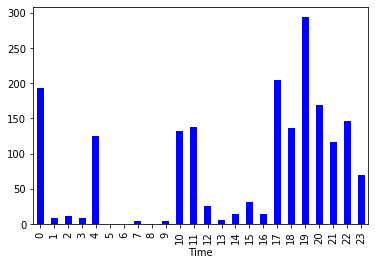

In [28]:
_= show_domain_stats('facebook', 'blue')

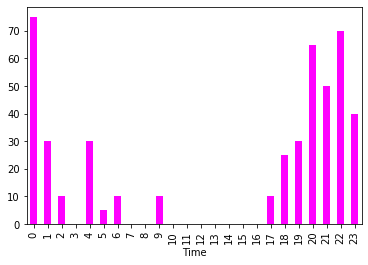

In [29]:
_ = show_domain_stats('stackover', 'magenta')


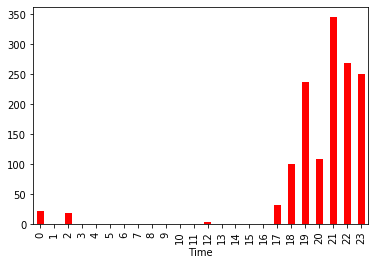

In [30]:
_ = show_domain_stats('netflix', 'red')


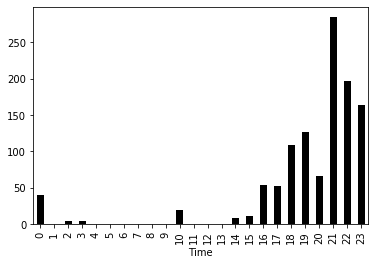

In [31]:
_=show_domain_stats('amazon', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

### Do you give permission for another student to analyze your `history_cleaned.csv`? 

(Your name will stay confidencial)

answer here

### What do you think about this assignment? ( 3 sentences at most! ) 

answer here